In [1]:
%cd /content/drive/MyDrive/Dataset/rokomari_books

/content/drive/MyDrive/Dataset/rokomari_books


In [2]:
!ls

books.csv  rokomari_books_preprocessing.ipynb


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# !python -m pip install -U pycld2

In [5]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=7f1f04fac9c8aaf865ed43dd9e7670474696a7297878a418cc9266079eb612b2
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [6]:
# import pycld2 as cld2
import langdetect as ld

In [7]:
df = pd.read_csv("books.csv")

In [8]:
df.head(10)

,author,categories,isbn,n_ratings,n_reviews,price,prod_img_link,publisher,rating,summary,title
0,Roald Dahl,Foreign Language Books,9781785300837,No Ratings,No Reviews,1316,No image,‎ Black & White Publishing,0.0,No summary,Chairlie and the Chocolate Works
1,Robert Hugh Benson,Foreign Language Books: Novel,9780870612985,No Ratings,No Reviews,2520,No image,Christian Classics,0.0,No summary,Lord of the World
2,লু স্যুন,পশ্চিমবঙ্গের বই: সমকালীন গল্প,9788194097303,No Ratings,No Reviews,320,No image,ছাড়পত্র প্রকাশন (ইন্ডিয়া),0.0,No summary,নির্বাচিত গল্প সংকলন
3,আর্কাদি গাইদার,পশ্চিমবঙ্গের বই: শিশু-কিশোর উপন্যাস,9788193860939,No Ratings,No Reviews,180,No image,ছাড়পত্র প্রকাশন (ইন্ডিয়া),0.0,No summary,তিমুর ও তার দলবল
4,Robert Macfarlane,Others Medical Book,9780750621786,No Ratings,No Reviews,25202,No image,‎ Butterworth-Heinemann Ltd (India),0.0,No summary,"Outcome After Head, Neck and Spinal Trauma"
5,Abhishek Talwar,Foreign Language Books: Childrens Fiction Books,9789354072574,No Ratings,No Reviews,448,No image,Birch Books and Biplob World,0.0,No summary,The Adventures Of Biplob The Bumblebee
6,M.F. Ahmed,Urban and Regional Planning,9789843109361,No Ratings,No Reviews,6583,No image,Centre for Water Supply and Waste Management,0.0,,Water supply
7,Joseph D. Roder,Veterinary & Animal Sciences,9780750672405,No Ratings,No Reviews,7722,No image,‎ Butterworth-Heinemann Ltd (India),0.0,No summary,Veterinary Toxicology (The Practical Veterinar...
8,মতি নন্দী,পশ্চিমবঙ্গের বই: সমকালীন উপন্যাস,No ISBN,No Ratings,No Reviews,250,No image,ভালো বই (ইন্ডিয়া),0.0,No summary,নায়কের প্রবেশ ও প্রস্থান
9,উৎপলকুমার বসু,পশ্চিমবঙ্গের বই: বাংলা কবিতা,No ISBN,No Ratings,No Reviews,300,No image,ভালো বই (ইন্ডিয়া),0.0,No summary,হাঁস চলার পথ


In [9]:
df.shape

(141585, 11)

In [10]:
def detect_language(row):
    try:
        lang = ld.detect(str(row))
    except:
        return 'unknown'
    return lang

In [11]:
df['language'] = df['title'].apply(detect_language)

In [12]:
df['language'].value_counts()

,count
language,
bn,98291
en,36582
de,1382
tl,432
id,419
nl,404
ca,399
ro,388
it,377


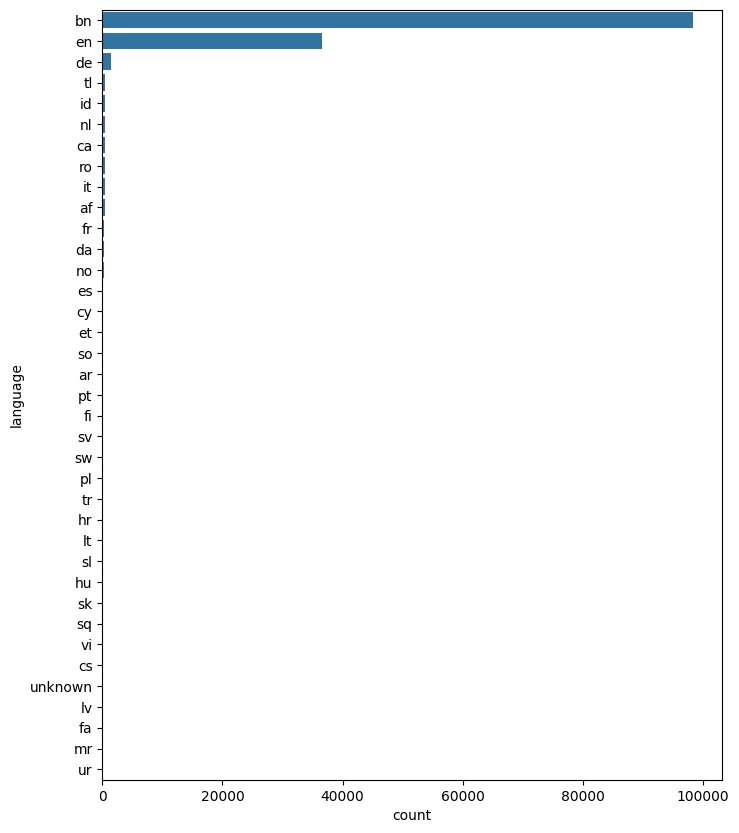

In [13]:
plt.figure(figsize=(8, 10))
sns.countplot(df['language'], order=df['language'].value_counts().index)
plt.show()

In [14]:
df.loc[df['summary']==' ', 'summary'] = 'No summary'

In [15]:
len(df[df['summary'] == ' ']['summary'])

0

## Summary availability

In [16]:
def detect_summary(row):
    if row == "No summary":
        return "No"
    return "Yes"

In [17]:
df['summary_availability'] = df['summary'].apply(detect_summary)

In [30]:
temp_df = df['summary_availability'].value_counts().reset_index()
temp_df['percentage'] = (temp_df['count'] / df.shape[0] * 100).round(2)
temp_df

,summary_availability,count,percentage
0,No,100208,70.78
1,Yes,41377,29.22


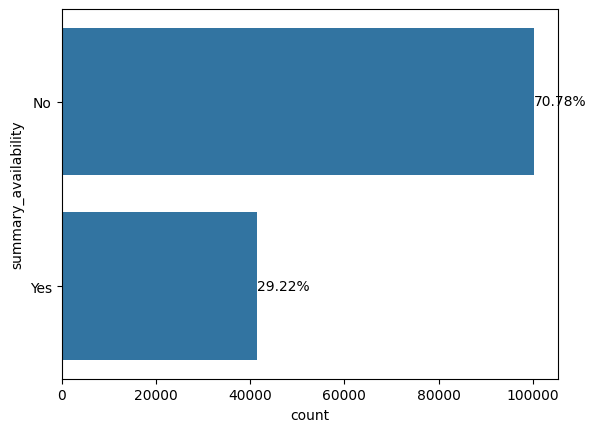

In [31]:
sns.countplot(df['summary_availability'])

for index, row in temp_df.iterrows():
    plt.text(row['count'], index, f"{row['percentage']:.2f}%",
             color='black', va="center")
plt.show()


In [32]:
df.to_csv("books_modified_1.csv", index=False)

In [33]:
df_bn = df[df['language'] == 'bn']

In [34]:
df_bn.head()

,author,categories,isbn,n_ratings,n_reviews,price,prod_img_link,publisher,rating,summary,title,language,summary_availability
2,লু স্যুন,পশ্চিমবঙ্গের বই: সমকালীন গল্প,9788194097303,No Ratings,No Reviews,320,No image,ছাড়পত্র প্রকাশন (ইন্ডিয়া),0.0,No summary,নির্বাচিত গল্প সংকলন,bn,No
3,আর্কাদি গাইদার,পশ্চিমবঙ্গের বই: শিশু-কিশোর উপন্যাস,9788193860939,No Ratings,No Reviews,180,No image,ছাড়পত্র প্রকাশন (ইন্ডিয়া),0.0,No summary,তিমুর ও তার দলবল,bn,No
8,মতি নন্দী,পশ্চিমবঙ্গের বই: সমকালীন উপন্যাস,No ISBN,No Ratings,No Reviews,250,No image,ভালো বই (ইন্ডিয়া),0.0,No summary,নায়কের প্রবেশ ও প্রস্থান,bn,No
9,উৎপলকুমার বসু,পশ্চিমবঙ্গের বই: বাংলা কবিতা,No ISBN,No Ratings,No Reviews,300,No image,ভালো বই (ইন্ডিয়া),0.0,No summary,হাঁস চলার পথ,bn,No
10,দিলরুবা হাসান,বয়স যখন ৪-৮: শিক্ষামূলক,No ISBN,No Ratings,No Reviews,129,No image,বৃত্তকলা একাডেমি,0.0,No summary,অনুভূতির ছোঁয়া,bn,No


In [35]:
df_bn.shape

(98291, 13)

In [37]:
temp_df = df_bn['summary_availability'].value_counts().reset_index()
temp_df['percentage'] = (temp_df['count'] / df_bn.shape[0] * 100).round(2)
temp_df

,summary_availability,count,percentage
0,No,63738,64.85
1,Yes,34553,35.15


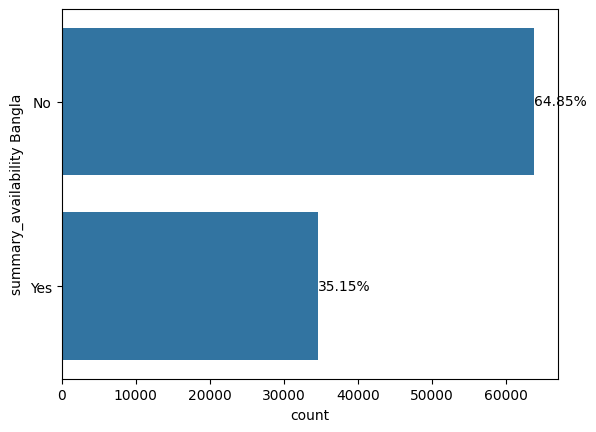

In [39]:
sns.countplot(df_bn['summary_availability'])

for index, row in temp_df.iterrows():
    plt.text(row['count'], index, f"{row['percentage']:.2f}%",
             color='black', va="center")
plt.ylabel("summary_availability Bangla")
plt.show()


In [67]:
df_bn[~(df_bn['summary'] == 'No summary')].shape

(34551, 13)

In [49]:
df_bn[df_bn['rating'] >= 4.00]['rating'].value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
rating,5.0,4.0,4.5,4.67,4.33,4.75,4.8,4.25,4.6,4.4,...,4.34,4.06,4.05,4.97,4.98,4.03,4.96,4.02,4.99,4.01
count,20666.0,2109.0,1099.0,621.00,490.00,372.00,250.0,234.00,218.0,192.0,...,12.00,12.00,10.00,9.00,7.00,7.00,7.00,7.00,1.00,1.00


In [69]:
df_bn_with_summary = df_bn[~(df_bn['summary'] == 'No summary')]

In [70]:
df_bn_with_summary.shape

(34551, 13)

In [71]:
df_bn_with_summary['n_ratings'].value_counts()

,count
n_ratings,
No Ratings,17757
1,4855
2,2552
3,1585
4,1114
...,...
732,1
843,1
132,1


In [72]:
df_bn_with_summary['n_reviews'].value_counts()

,count
n_reviews,
No Reviews,17757
No Review,5172
1 Review,4123
2 Reviews,1757
3 Reviews,1094
...,...
196 Reviews,1
164 Reviews,1
668 Reviews,1
